In [1]:
import os
import sklearn
import numpy as np



%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Демонстраційна частина

### Бінарна класифікація

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

## звузимо задачу до двох ознак, бінарної класифікації
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf")) # C=float("inf") відповідає нульовій толерантності до "порушників коридору"
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Проілюструємо отриману модель

In [3]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [4]:
svm_clf.intercept_[0]

-3.7882347112962464

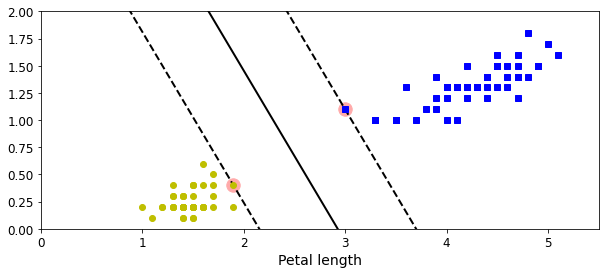

In [5]:
x0 = np.linspace(0, 5.5, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Розділова пряма виглядає як w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1] # проекція на вертикальну вісь
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# Чутливість до масштабування

In [6]:
# створимо штучний міні датасет
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# натренуємо модель
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

(0.0, 6.0, 0.0, 90.0)

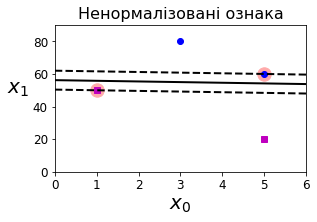

In [7]:
plt.figure(figsize=(4.5,2.7))
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

## скористаємося функцією, що ми ввели вище
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Ненормалізовані ознака", fontsize=16)
plt.axis([0, 6, 0, 90])

In [8]:
### Нормалізуємо ознаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
#help(StandardScaler)

In [10]:
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

(-2.0, 2.0, -2.0, 2.0)

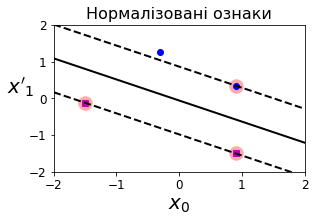

In [11]:
plt.figure(figsize=(4.5,2.7))
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Нормалізовані ознаки", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Чутливість до викидів (жорстка модель)

Додамо кілька викидів до датасету ірисів

In [12]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

Натренуємо модель з низькою толерантністю до "порушників"

In [13]:
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

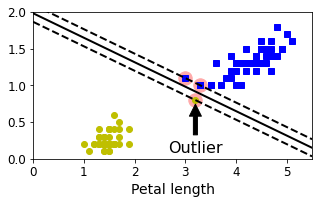

In [14]:
fig, axes = plt.subplots(ncols=1, figsize=(5,2.7), sharey=True)

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

Зменшимо параметр C, що контролює нетолерантність до "порушників", до 1.

In [15]:
svm_clf3 = SVC(kernel="linear", C=1)
svm_clf3.fit(Xo2, yo2)

SVC(C=1, kernel='linear')

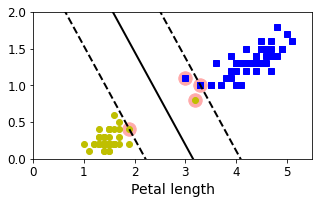

In [16]:
fig, axes = plt.subplots(ncols=1, figsize=(5,2.7), sharey=True)

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf3, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# Нелінійна задача класифікації

Створемо штучний датасет

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [18]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

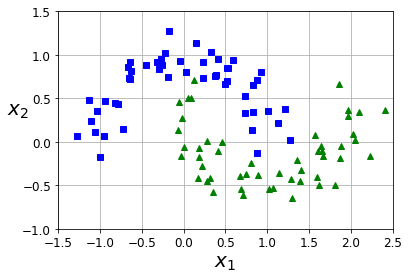

In [19]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Поліноміальне ядро

Ми можемо у явному вигляді відобразити ознаки у інший простір

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [21]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

In [22]:
polynomial_svm_clf.fit(X, y)

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [23]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

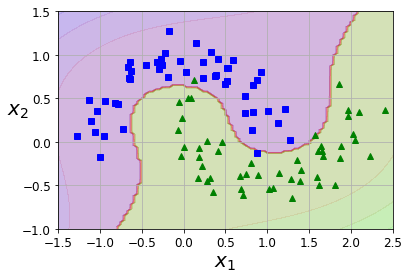

In [24]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Або, можемо використати поліноміальне ядро

In [25]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
## більше про поліноміальне ядро
# help(sklearn.metrics.pairwise.polynomial_kernel)

In [27]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

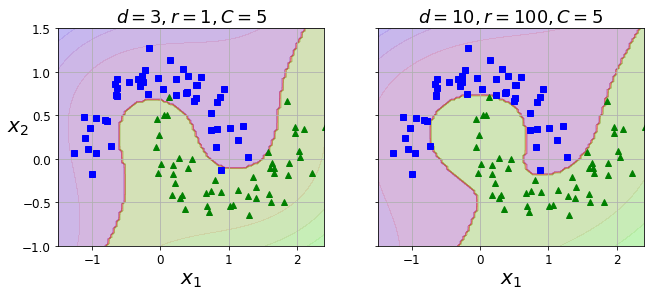

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

Більша степінь ядра --> більша складність моделі, що може призвести до перенавчання

### Гаусове ядро (радіальні базисні функції)

In [29]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [30]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y1D = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

(-4.5, 4.5, -0.2, 0.2)

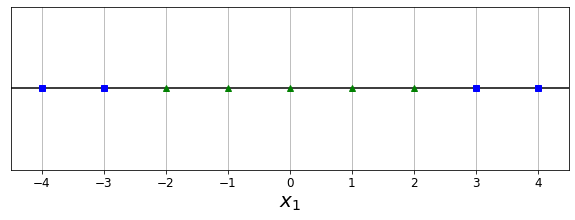

In [31]:
plt.figure(figsize=(10, 3))

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y1D==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y1D==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

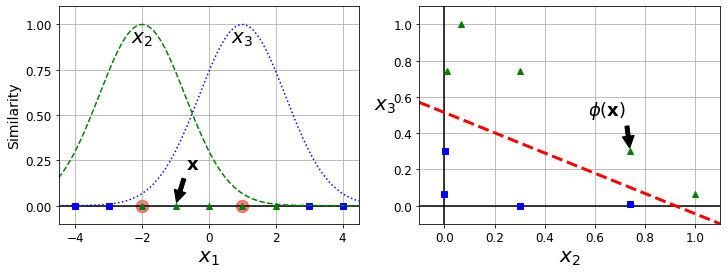

In [32]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

Повернемося до задачі з ірисами

In [33]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Використаємо різні значення параметрів gamma та C

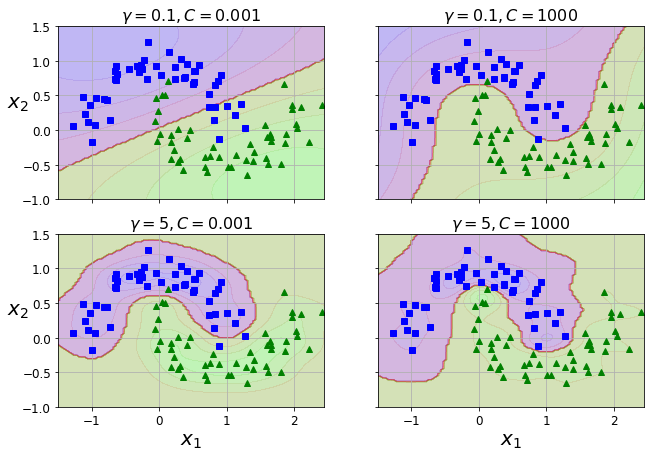

In [34]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
        
plt.show()

# Вибір оптимальних параметрів

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
dataset = load_breast_cancer()

In [37]:
X, y = dataset['data'], dataset['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=0.3)

In [39]:
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
y_pred = svm_clf.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.9064327485380117

Спробуємо знайти кращі гіперпараметри моделі

In [42]:
from sklearn.model_selection import  GridSearchCV

In [43]:
# Пошук параметрів
param_grid = {
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C': [0.1,1,5,10, 20, 40, 80, 160, 320],
}
search = GridSearchCV(svm_clf, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.962):
{'C': 160, 'gamma': 1e-05}


In [44]:
svm_clf_best = SVC(kernel="rbf", **search.best_params_, random_state=42)
svm_clf_best.fit(X_train, y_train)

SVC(C=160, gamma=1e-05, random_state=42)

In [45]:
y_pred = svm_clf_best.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.9298245614035088

Рандомізований пошук

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.00001, 0.1), "C": uniform(1, 200)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=100, verbose=1, cv=3)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.5s finished


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd72991d890>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd727842290>},
                   verbose=1)

In [48]:
print(rnd_search_cv.best_params_)

{'C': 116.82215030818507, 'gamma': 1.0020866574229947e-05}


In [49]:
svm_clf_best2 = SVC(kernel="rbf", **rnd_search_cv.best_params_, random_state=42)
svm_clf_best2.fit(X_train, y_train)

SVC(C=116.82215030818507, gamma=1.0020866574229947e-05, random_state=42)

In [50]:
y_pred = svm_clf_best2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

# Задача регресії

In [51]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [52]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [53]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

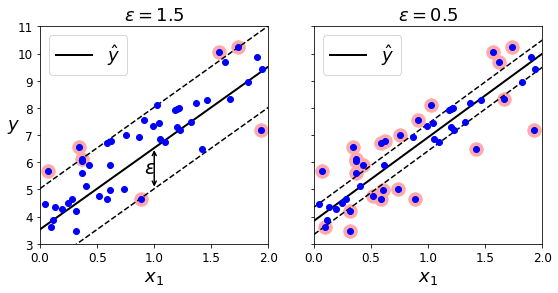

In [54]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [55]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [56]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [57]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

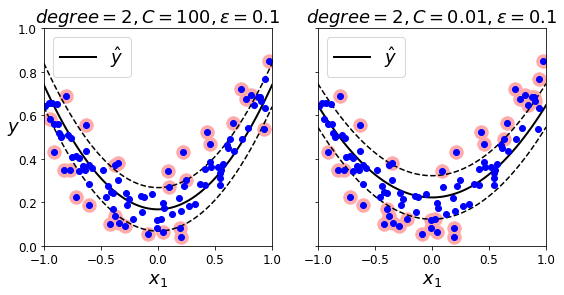

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

# Завдання

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, train_test_split)

Завдання 1. Завантажте датасет рукописних цифр MNIST як вказано нижче. Натренуйте SVM з лінійним ядром. Яка отримана точність? Натренуйте також модель логістичної регресії.

In [60]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

y = 5


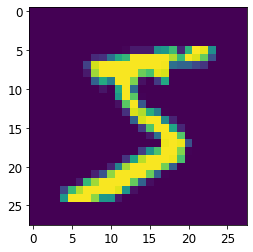

In [61]:
plt.imshow(X_train[0].reshape(28,28))
print("y =", y_train[0])

In [62]:
%%time
svm = SVC(kernel='linear', verbose=True, random_state=42, cache_size=400, max_iter=1000)
svm.fit(X_train, y_train)

[LibSVM]CPU times: user 4min 12s, sys: 767 ms, total: 4min 12s
Wall time: 4min 12s


/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(cache_size=400, kernel='linear', max_iter=1000, random_state=42,
    verbose=True)

In [63]:
yhat = svm.predict(X_test)

In [64]:
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.8004


In [65]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [66]:
yhat = logreg.predict(X_test)
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.9255


Завдання 2. Нормалізуйте ознаки і знов натренуйте модель з лінійним ядром. Як змінилася точність?

In [67]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', verbose=True, random_state=42, cache_size=400, max_iter=1000))])

pipe.fit(X_train, y_train)

[LibSVM]

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(cache_size=400, kernel='linear', max_iter=1000,
                     random_state=42, verbose=True))])

In [68]:
yhat = pipe.predict(X_test)
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.807


Accuracy is higher, but not significantly.

Завдання 3. Натренуйте модель з гаусовим ядром. Як змінилася точність?

In [69]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', verbose=True, random_state=42, cache_size=400, max_iter=1000))])

pipe.fit(X_train, y_train)

[LibSVM]

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(cache_size=400, max_iter=1000, random_state=42,
                     verbose=True))])

In [70]:
yhat = pipe.predict(X_test)
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.9664


Accuracy of SVM with rbf kernel is much higher comperetively to linear one.

Завдання 4. Оберіть найкращі параметри шляхом повного перебору (GridSearch) та рандомізованого пошуку (RandomSearchCV). Використайте лише частину тренувальної вибірки (у ролі валідаційної). Натренуйте модель на усій тренувальній вибірці. Як змінилася точність?

In [71]:
std_scaler =StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [80]:
samples = 10000
grid_params = {
    'C':[0,1,5,10],
    'gamma': [
        scale_gamma*0.1, scale_gamma, scale_gamma*10, 
        auto_gamma*0.1, auto_gamma, auto_gamma*10,],
#     'kernel': ('poly', 'rbf'),
#     'degree': [3,5]
}

gs = GridSearchCV(
    estimator=SVC(),
    n_jobs=-1,
    cv=3,
    scoring='accuracy',
    verbose=True,
    param_grid=grid_params
)

%time gs.fit(std_scaler.transform(X_train[:samples]), y_train[:samples])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 13.6min finished


CPU times: user 26.5 s, sys: 157 ms, total: 26.7 s
Wall time: 14min 3s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 5, 10],
                         'gamma': [2.06632285641914e-08, 2.0663228564191396e-07,
                                   2.0663228564191398e-06,
                                   0.00012755102040816325,
                                   0.0012755102040816326,
                                   0.012755102040816325]},
             scoring='accuracy', verbose=True)

In [74]:
scale_gamma = 1 / (X_train.shape[1] * X_train.var())
auto_gamma = 1 / X_train.shape[1]

scale_gamma, auto_gamma

(2.0663228564191396e-07, 0.0012755102040816326)

In [81]:
gs.best_score_

0.9400997688251129

In [82]:
gs.best_params_

{'C': 5, 'gamma': 0.0012755102040816326}

In [83]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**gs.best_params_))])

%time pipe.fit(X_train, y_train)

CPU times: user 8min 23s, sys: 152 ms, total: 8min 23s
Wall time: 8min 23s


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=5, gamma=0.0012755102040816326))])

In [84]:
yhat = pipe.predict(X_test)
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.9729


In [90]:
samples = 10000
grid_params = {
    'C':[0,1,5,10],
    'gamma': [
        scale_gamma*0.1, scale_gamma, scale_gamma*10, 
        auto_gamma*0.1, auto_gamma, auto_gamma*10,],
    'kernel': ('poly', 'rbf'),
    'degree': [3,5]
}
rs = RandomizedSearchCV(
    estimator=SVC(),
    n_iter = 20,
    n_jobs=-1,
    cv=3,
    scoring='accuracy',
    verbose=True,
    param_distributions=grid_params,
    random_state=42,

)

%time rs.fit(std_scaler.transform(X_train[:samples]), y_train[:samples])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.0min finished


CPU times: user 26.7 s, sys: 129 ms, total: 26.9 s
Wall time: 10min 29s


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0, 1, 5, 10], 'degree': [3, 5],
                                        'gamma': [2.06632285641914e-08,
                                                  2.0663228564191396e-07,
                                                  2.0663228564191398e-06,
                                                  0.00012755102040816325,
                                                  0.0012755102040816326,
                                                  0.012755102040816325],
                                        'kernel': ('poly', 'rbf')},
                   random_state=42, scoring='accuracy', verbose=True)

In [91]:
rs.best_score_

0.9400997688251129

In [92]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 0.0012755102040816326, 'degree': 5, 'C': 5}

In [93]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**rs.best_params_))])

%time pipe.fit(X_train, y_train)

CPU times: user 8min 25s, sys: 139 ms, total: 8min 25s
Wall time: 8min 25s


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=5, degree=5, gamma=0.0012755102040816326))])

In [94]:
yhat = pipe.predict(X_test)
print('Accuracy', np.mean(yhat==y_test))

Accuracy 0.9729


GridSearchCV and RandomizedSearchCV give us same parameteres. It shows us best accuracy obtained, especially if it is trained on full train set.